#Classification Problem : Credit Card Offer

##1. Cleaning the CSV file to be uploaded on MySQLworkbench

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('creditcardmarketing.csv') 
df.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [5]:
# function 1
def renaming(df):
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    df.columns = df.columns.str.replace('#_','')
    return df.info()

In [6]:
renaming(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

In [91]:
# saving the dataframe into CVS file for SQL 

df.to_csv('credit_card_data.csv')

In [ ]:
##2. Exploration of the data

In [7]:
# I pass ID as the index
df = df.set_index('customer_number')

In [ ]:
## 2.1 - Exploring categorical data

In [19]:
df_cat = df.select_dtypes('object')

for col in df_cat.select_dtypes('object'):
    print (df_cat[col].nunique(), '\n')
    print(df_cat[col].value_counts(), '\n')


2 

No     16977
Yes     1023
Name: offer_accepted, dtype: int64 

3 

Air Miles    6061
Cash Back    5999
Points       5940
Name: reward, dtype: int64 

2 

Postcard    9147
Letter      8853
Name: mailer_type, dtype: int64 

3 

Medium    9013
High      4526
Low       4461
Name: income_level, dtype: int64 

2 

No     15322
Yes     2678
Name: overdraft_protection, dtype: int64 

3 

High      6071
Medium    5972
Low       5957
Name: credit_rating, dtype: int64 

2 

Yes    11655
No      6345
Name: own_your_home, dtype: int64 



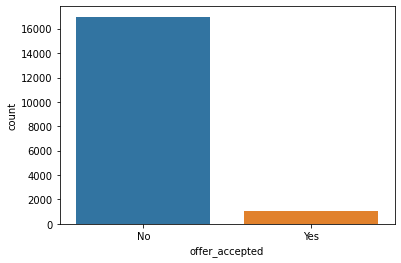

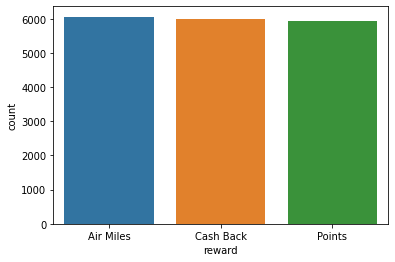

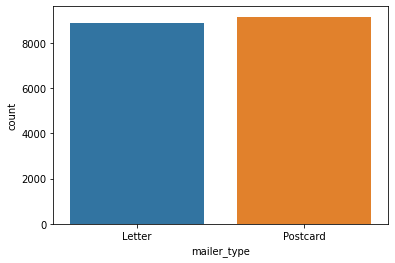

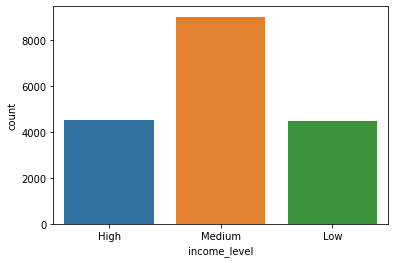

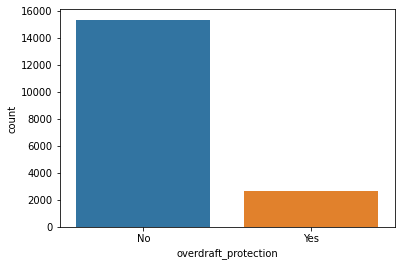

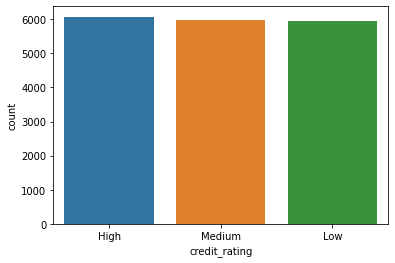

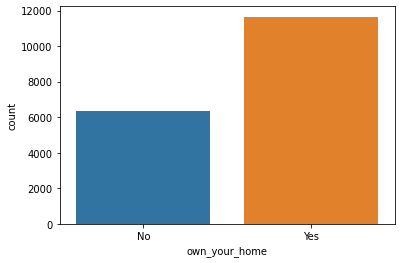

In [27]:
# visualizing the data ->target column "accepted_offer" has high imbalance

for col in df_cat:
    sns.countplot(df_cat[col])
    plt.show()

In [8]:
df.isna().sum()

offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64